In [80]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [81]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic


In [82]:
df = pd.read_csv("./Python/Output/SinVar.txt", sep='\t')
df.head()

NoiseType  Noise         X           sin  Error Deviation  Error Minimum  \
0  Gaussian    1.0 -3.141593 -1.224647e-16         1.003109      -1.520867   
1   Uniform    1.0 -3.141593 -1.224647e-16         1.123581      -1.520867   
2  Gaussian    1.0 -2.945243 -1.950903e-01         1.001545      -1.236887   
3   Uniform    1.0 -2.945243 -1.950903e-01         1.118664      -1.236887   
4  Gaussian    1.0 -2.748894 -3.826834e-01         0.999258      -0.978172   

   Error Maximum  Value Deviation  Uncertainty          Mean  ...       1.1  \
0       1.520867         0.659564     0.657520 -6.050007e-03  ...  0.312500   
1       1.520867         0.738776     0.657520  4.547019e-17  ...  0.276472   
2       1.836469         0.651760     0.650754  7.016414e-02  ...  0.246500   
3       1.835523         0.727975     0.650754  8.393038e-02  ...  0.220478   
4       2.190939         0.630624     0.631092  1.436819e-01  ...  0.224000   

        1.3       1.5      1.7       1.9     2.1  2.3  2.5  2.7  2.9  
0  0.373000  0.464000  0.00000  0.000000  0.0000  0.0  0.0  0.0  0.0  
1  0.375462  0.812419  0.00000  0.000000  0.0000  0.0  0.0  0.0  0.0  
2  0.241000  0.258500  0.31800  0.185500  0.0000  0.0  0.0  0.0  0.0  
3  0.248475  0.303970  0.49645  0.264474  0.0000  0.0  0.0  0.0  0.0  
4  0.195000  0.199500  0.18400  0.181000  0.3145  0.0  0.0  0.0  0.0  

[5 rows x 41 columns]

In [83]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0]

In [84]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [85]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

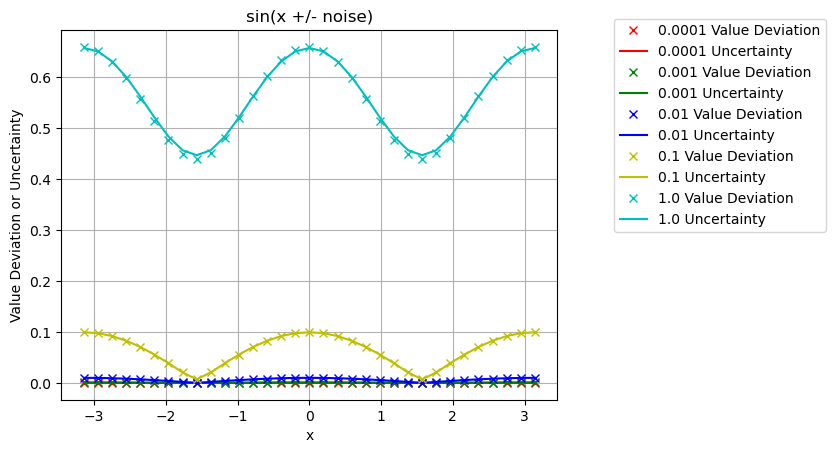

In [86]:
PlotValues()

In [87]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

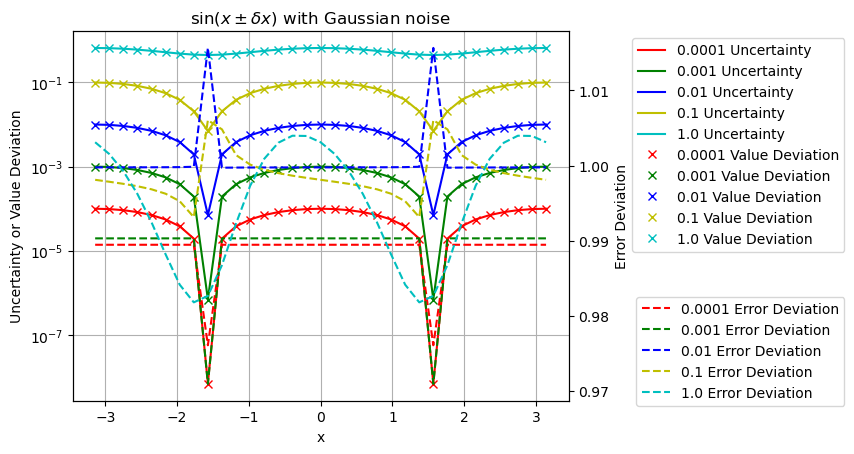

In [88]:
PlotErrorDev()

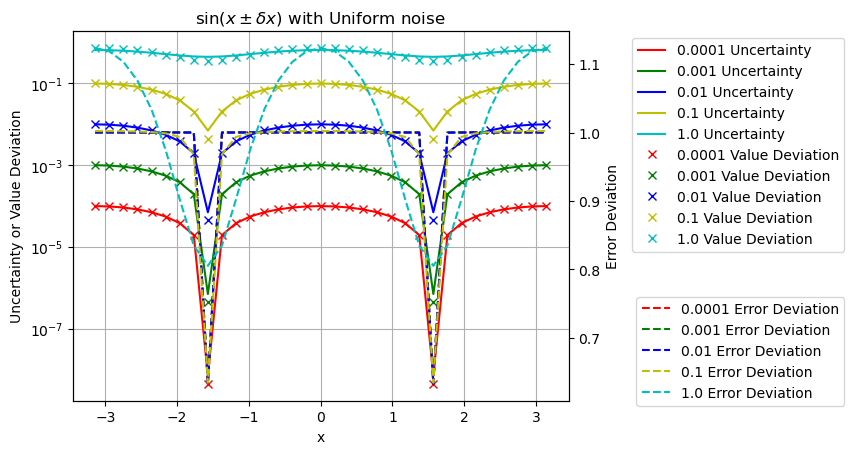

In [89]:
PlotErrorDev('Uniform')

# Mean vs Bias

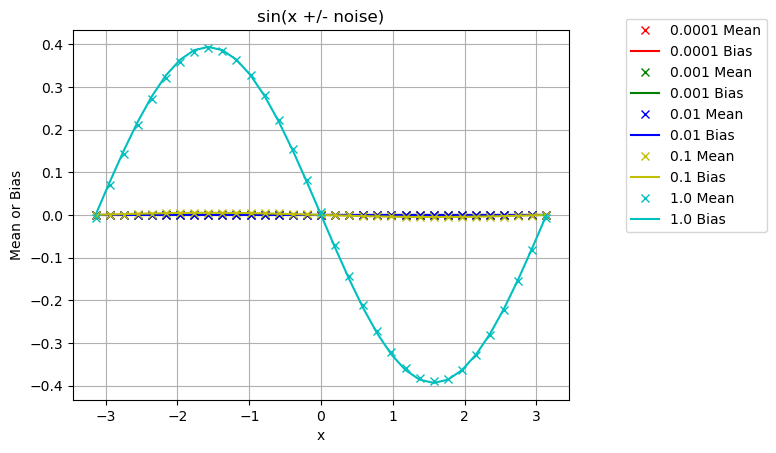

In [90]:
PlotValues(sValue=['Mean', 'Bias'])

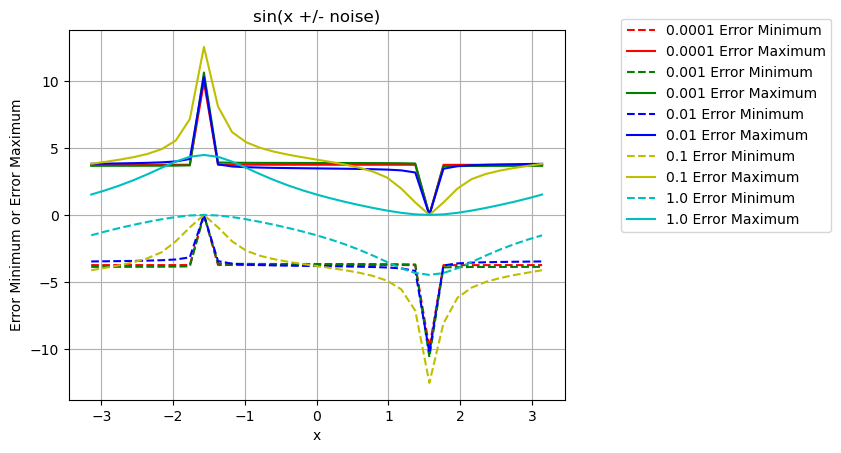

In [91]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'])

# Histogram

In [92]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

-2.9  -2.7  -2.5  -2.3  -2.1  -1.9  -1.7      -1.5      -1.3      -1.1  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.492500  0.354500  0.317500   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.812419  0.375462  0.276472   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.359500  0.556000   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.633937  0.694431   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000  0.000000   

   ...       1.1       1.3       1.5      1.7       1.9     2.1  2.3  2.5  \
0  ...  0.312500  0.373000  0.464000  0.00000  0.000000  0.0000  0.0  0.0   
1  ...  0.276472  0.375462  0.812419  0.00000  0.000000  0.0000  0.0  0.0   
2  ...  0.246500  0.241000  0.258500  0.31800  0.185500  0.0000  0.0  0.0   
3  ...  0.220478  0.248475  0.303970  0.49645  0.264474  0.0000  0.0  0.0   
4  ...  0.224000  0.195000  0.199500  0.18400  0.181000  0.3145  0.0  0.0   

   2.7  2.9  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 30 columns]

In [93]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


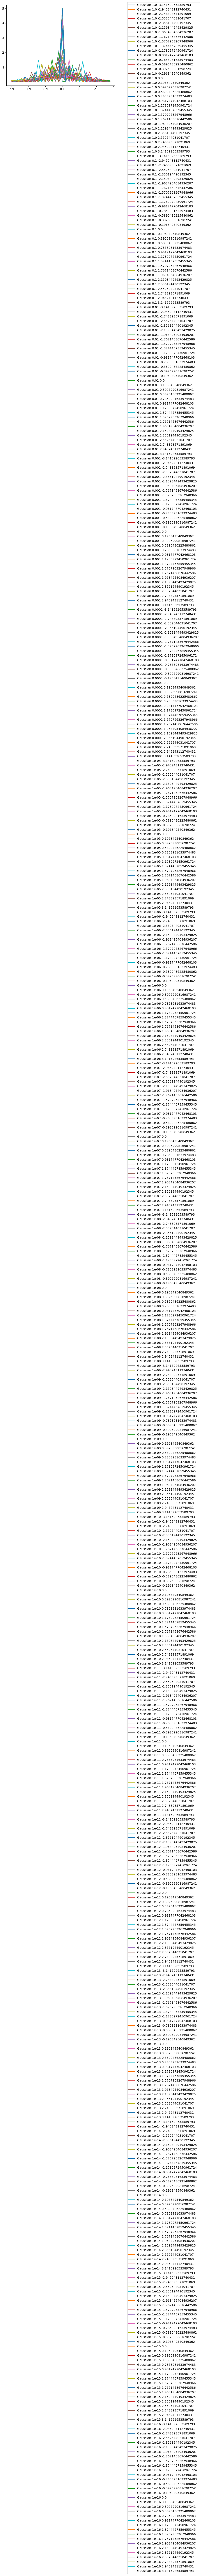

In [94]:
PlotHisto(sNoiseType=['Gaussian'])

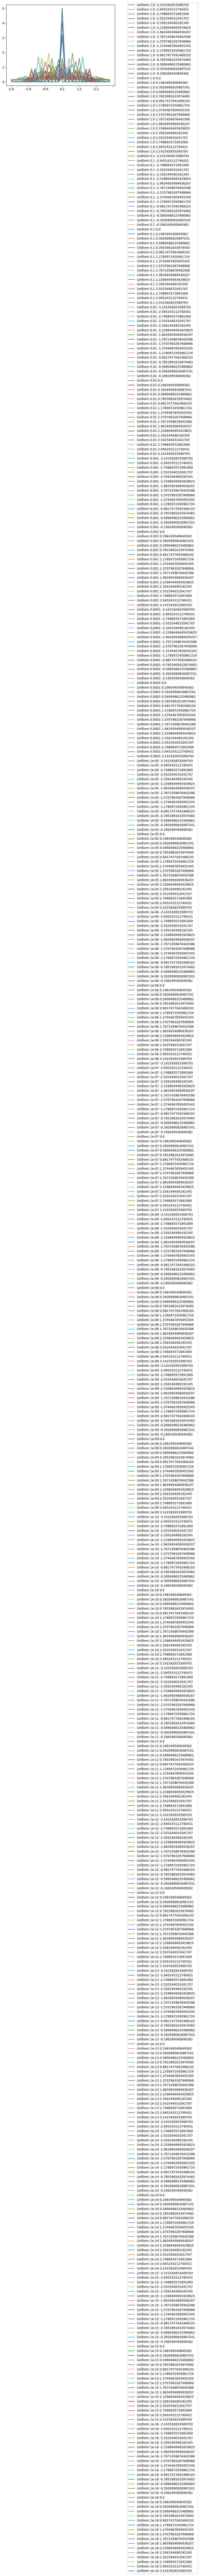

In [95]:
PlotHisto()

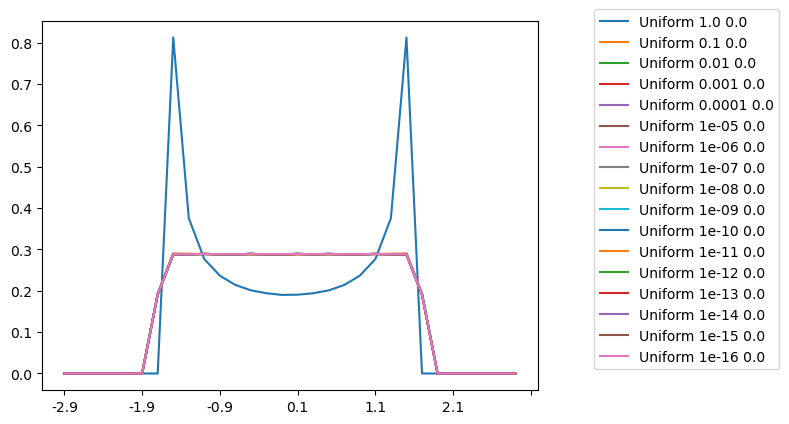

In [96]:
PlotHisto(sX=[0])

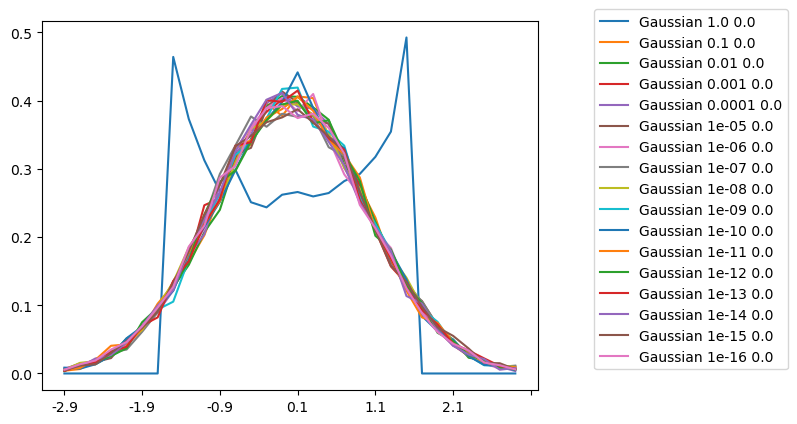

In [97]:
PlotHisto(['Gaussian'], sX=[0])

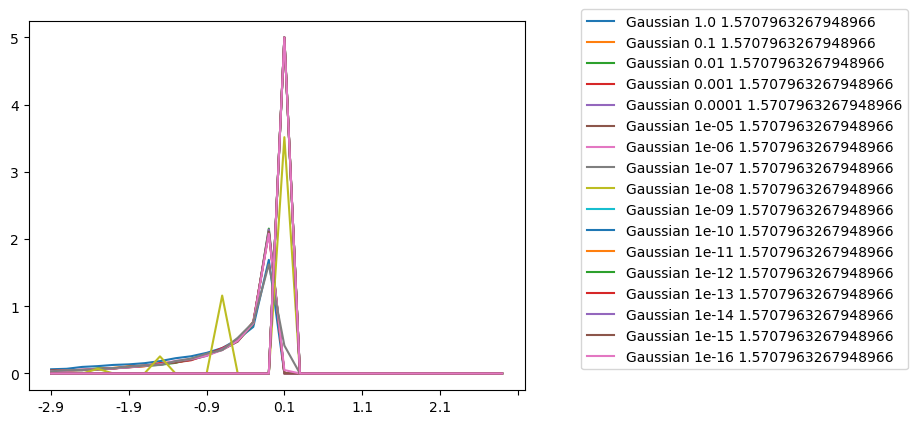

In [98]:
PlotHisto(['Gaussian'], sX=[math.pi/2])

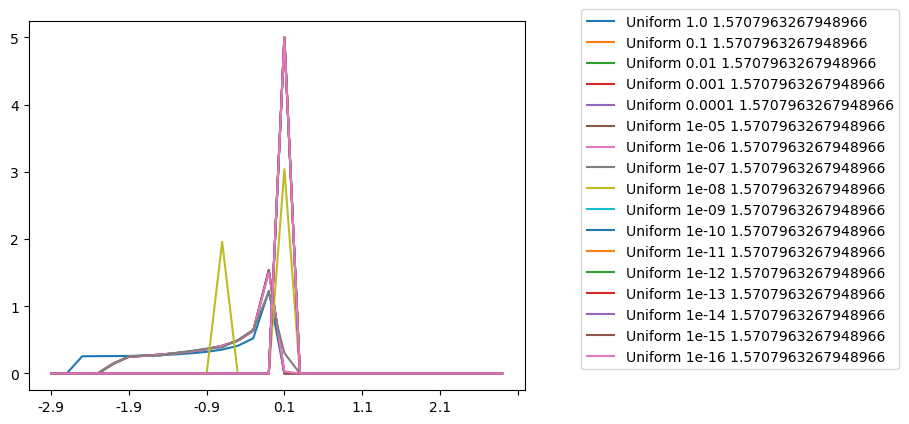

In [99]:
PlotHisto(['Uniform'], sX=[math.pi/2])

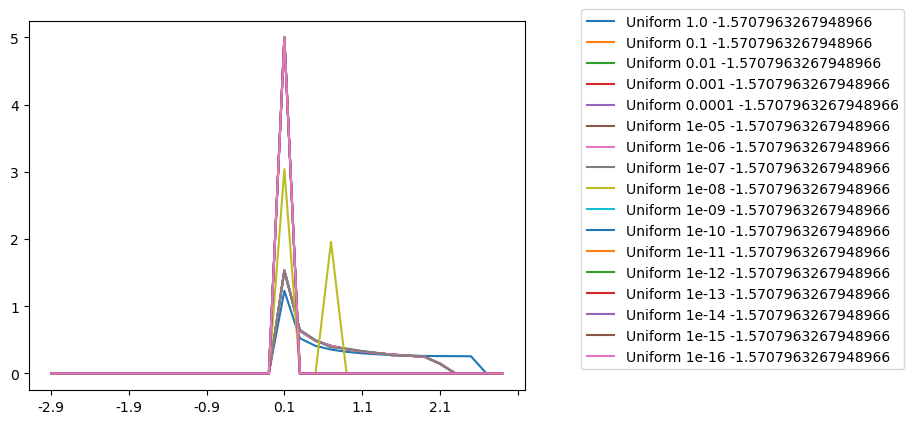

In [100]:
PlotHisto(['Uniform'], sX=[-math.pi/2])

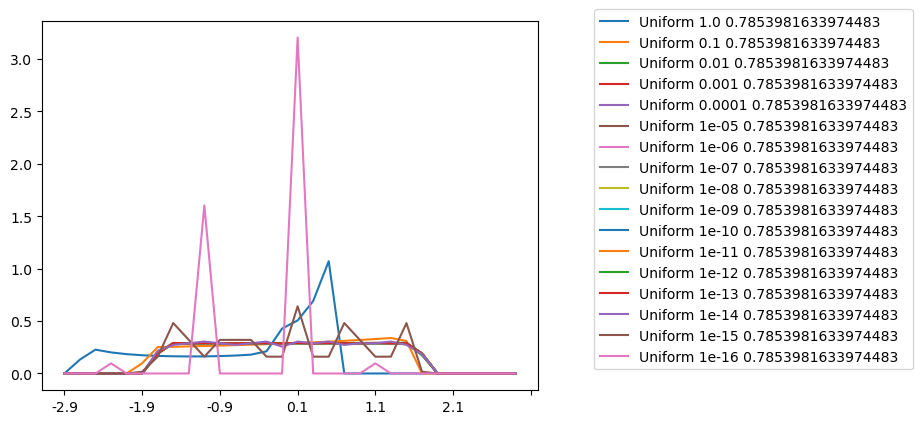

In [101]:
PlotHisto(['Uniform'], sX=[math.pi/4])

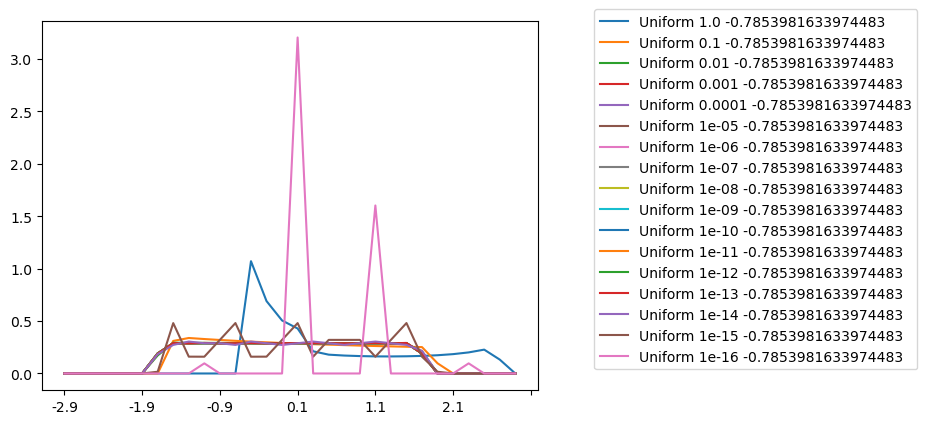

In [102]:
PlotHisto(['Uniform'], sX=[-math.pi/4])

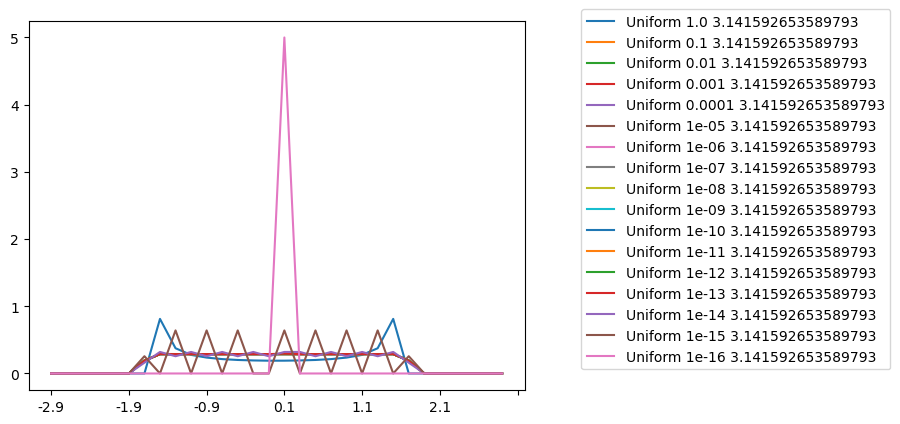

In [103]:
PlotHisto(['Uniform'], sX=[math.pi])

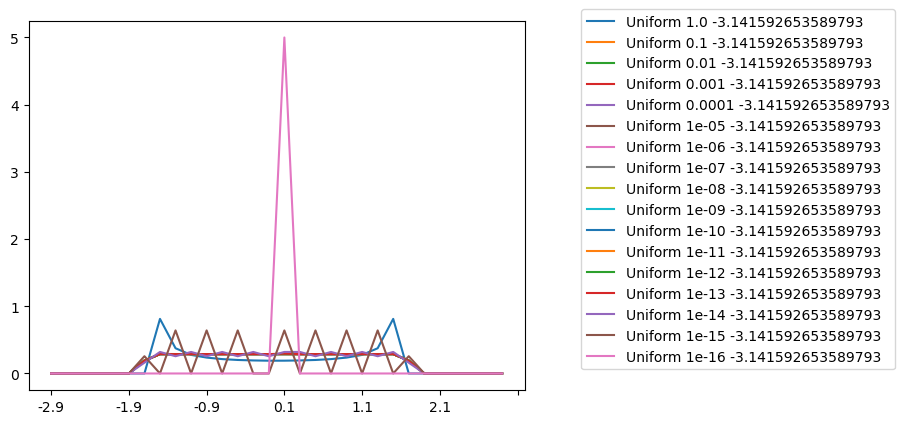

In [104]:
PlotHisto(['Uniform'], sX=[-math.pi])